In [1]:
from helper.dataset_reader import read_tsv
from langid_crf import *

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
langid = LanguageIdentifier()

## Scenario 1
1. Using different data for training and test data.
2. Include named entity

In [3]:
train_data = read_tsv('../dataset/train-data-140422.tsv')
test_data = read_tsv('../dataset/test-data-140422.tsv')
data = read_tsv('../raw dataset/all-tagged-090422-merged-no-ne.tsv')


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.93      0.97      0.95     11139
          JV       0.92      0.89      0.90      4906
          EN       0.87      0.93      0.90      1746
           O       0.96      0.93      0.95      5476
   MIX-ID-EN       0.91      0.85      0.88       578
   MIX-ID-JV       0.87      0.60      0.71       204
   MIX-JV-EN       0.91      0.52      0.66       258

    accuracy                           0.93     24307
   macro avg       0.91      0.81      0.85     24307
weighted avg       0.93      0.93      0.93     24307



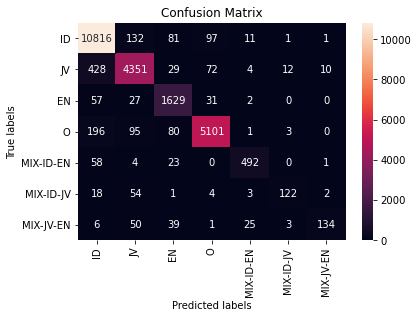


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       1.00      1.00      1.00     56598
          JV       0.99      0.98      0.99      9702
          EN       1.00      1.00      1.00     14323
           O       1.00      1.00      1.00     25223
   MIX-ID-EN       1.00      1.00      1.00      2394
   MIX-ID-JV       1.00      1.00      1.00       712
   MIX-JV-EN       0.99      1.00      1.00       530

    accuracy                           1.00    109482
   macro avg       1.00      1.00      1.00    109482
weighted avg       1.00      1.00      1.00    109482



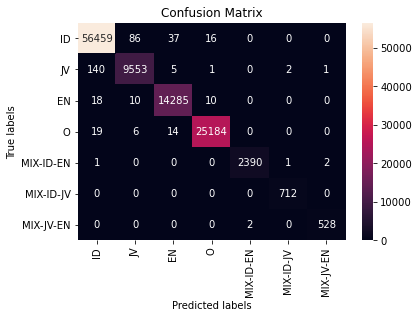


Top likely transitions:
O          -> O          1.62240
JV         -> JV         1.16339
EN         -> EN         0.79013
ID         -> O          0.64653
O          -> JV         0.63588
O          -> ID         0.57328
ID         -> ID         0.57257
EN         -> O          0.56438
JV         -> O          0.51758
O          -> EN         0.36100
MIX-JV-EN  -> JV         0.11279
JV         -> MIX-JV-EN  0.07943
MIX-ID-JV  -> JV         0.06519
EN         -> ID         0.05733
ID         -> EN         0.03655
JV         -> MIX-ID-JV  0.02910
ID         -> JV         -0.03484
ID         -> MIX-ID-EN  -0.03962
MIX-ID-EN  -> ID         -0.05161
EN         -> JV         -0.08290

Top unlikely transitions:
MIX-ID-EN  -> EN         -0.44760
MIX-ID-JV  -> ID         -0.62482
O          -> MIX-JV-EN  -0.62682
MIX-ID-EN  -> MIX-ID-EN  -0.71954
MIX-ID-JV  -> EN         -0.80766
MIX-ID-JV  -> MIX-ID-JV  -0.81229
EN         -> MIX-JV-EN  -0.83178
MIX-ID-EN  -> MIX-ID-JV  -0.84722
MIX-ID-EN  -

In [4]:
langid.pipeline_split(train_data=train_data, test_data=test_data, model_name='mod_split_180422.pkl')

In [5]:
import eli5
eli5.show_weights(langid.model, horizontal_layout=False)

## Merge data


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.94      0.97      0.96     16332
          JV       0.91      0.90      0.90      4641
          EN       0.90      0.86      0.88      2218
           O       0.96      0.93      0.95      7500
   MIX-ID-EN       0.95      0.91      0.93       852
   MIX-ID-JV       0.94      0.87      0.90       286
   MIX-JV-EN       0.94      0.84      0.89       250

    accuracy                           0.94     32079
   macro avg       0.93      0.90      0.91     32079
weighted avg       0.94      0.94      0.94     32079



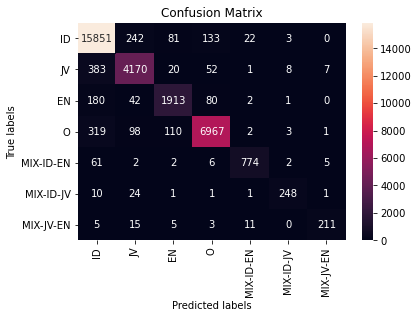


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       1.00      1.00      1.00     32845
          JV       0.99      0.99      0.99      9183
          EN       1.00      1.00      1.00      4404
           O       1.00      1.00      1.00     15055
   MIX-ID-EN       1.00      1.00      1.00      1833
   MIX-ID-JV       1.00      1.00      1.00       544
   MIX-JV-EN       0.99      0.99      0.99       533

    accuracy                           1.00     64397
   macro avg       1.00      1.00      1.00     64397
weighted avg       1.00      1.00      1.00     64397



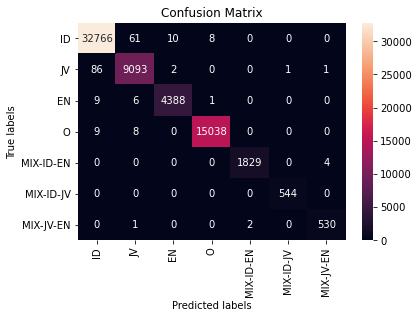


Top likely transitions:
O          -> O          1.96823
O          -> ID         1.03180
JV         -> JV         0.93467
ID         -> O          0.83693
O          -> JV         0.83368
O          -> EN         0.82965
JV         -> O          0.76362
EN         -> EN         0.71520
EN         -> O          0.69422
ID         -> ID         0.49808
ID         -> EN         0.21968
MIX-JV-EN  -> JV         0.11704
JV         -> MIX-JV-EN  0.10304
EN         -> ID         0.05089
MIX-ID-JV  -> JV         0.03973
MIX-JV-EN  -> O          -0.02870
MIX-ID-EN  -> ID         -0.06191
JV         -> EN         -0.08339
JV         -> MIX-ID-JV  -0.09303
O          -> MIX-ID-EN  -0.11898

Top unlikely transitions:
O          -> MIX-JV-EN  -0.44244
EN         -> MIX-ID-EN  -0.53244
MIX-JV-EN  -> EN         -0.60227
MIX-JV-EN  -> MIX-JV-EN  -0.60910
MIX-ID-JV  -> MIX-JV-EN  -0.61558
MIX-ID-JV  -> ID         -0.68929
ID         -> MIX-JV-EN  -0.71218
MIX-ID-EN  -> MIX-ID-EN  -0.79950
EN         

In [6]:
langid.pipeline_merge(data, 0.33, model_name='mod_merge_180422.pkl')